# Make a Machine Learning model to Predict a waiter's tips at a single restaurant

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
tips=pd.read_csv('tips(Restaurant Tips).csv',index_col=0)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## EDA

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
tips.apply(lambda col: col.unique(),axis=0)

total_bill    [16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.7...
tip           [1.01, 1.66, 3.5, 3.31, 3.61, 4.71, 2.0, 3.12,...
sex                                              [Female, Male]
smoker                                                [No, Yes]
day                                       [Sun, Sat, Thur, Fri]
time                                            [Dinner, Lunch]
size                                         [2, 3, 4, 1, 6, 5]
dtype: object

In [6]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

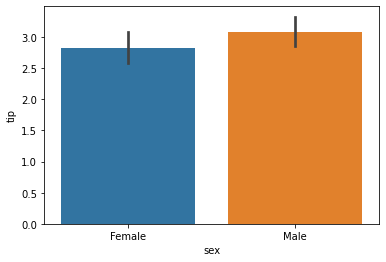

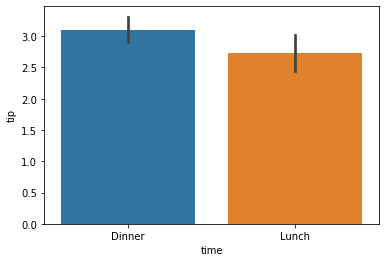

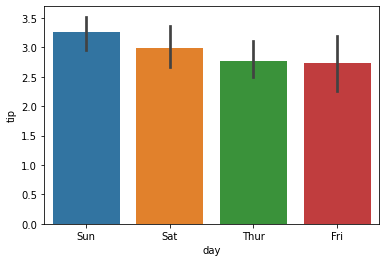

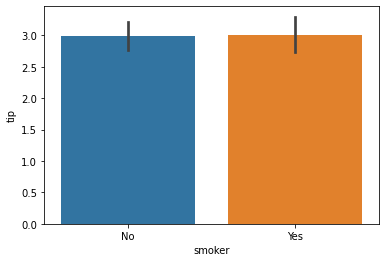

In [7]:
for i in ('sex','time','day','smoker'):
    sns.barplot(x=i, y='tip', data = tips)
    plt.show()


##### observations:
    1.As compared to females male are more likely give tips we can aslo say males are more likely to come alone and pay tips as compared to the females.
    2.most of the tips are recieved on sun ther can be sevral reasons for that
    3.Dinner time, tips are recieved more may be due to more people prefer to come at dinner time

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

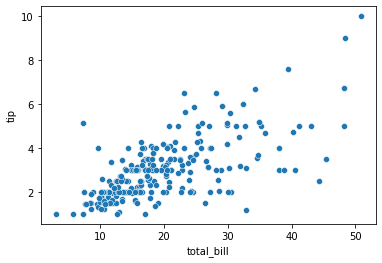

In [8]:
sns.scatterplot(x='total_bill', y='tip', data = tips)

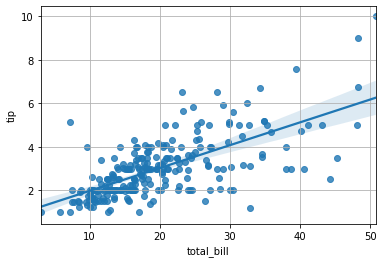

In [9]:
sns.regplot(x='total_bill',y='tip',data=tips)
plt.grid()

##### observations:
    1.Tip is significantl increasing as the total bill increases.

#### data Preprocessing

In [10]:
tips['sex'] = tips.sex.map({ 'Female' : 0, 'Male' : 1})
tips['smoker'] = tips.smoker.map({ 'No' : 0, 'Yes' : 1})
tips['time'] = tips.time.map({ 'Dinner' : 0, 'Lunch' : 1})
tips['day'] = tips.day.map({ 'Sun' : 3, 'Sat' : 2, 'Thur' : 0, 'Fri' : 1})

In [11]:
X = tips.drop('total_bill', axis=1)
Y = tips['total_bill']

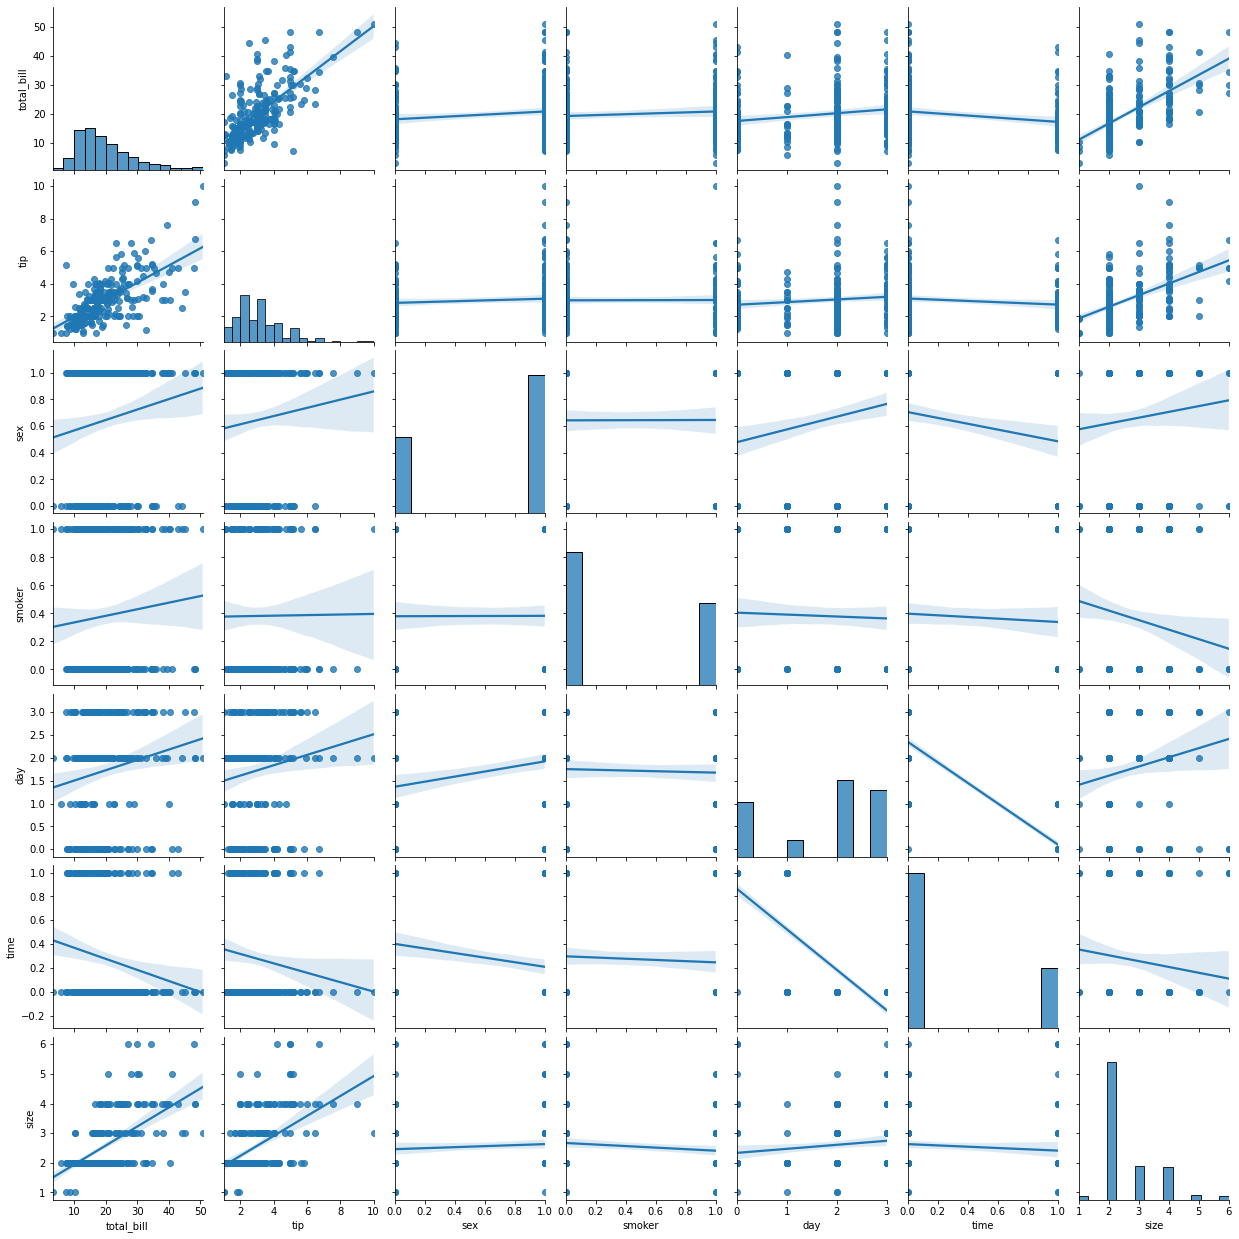

In [12]:
sns.pairplot(tips,kind='reg')

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tip     244 non-null    float64
 1   sex     244 non-null    int64  
 2   smoker  244 non-null    int64  
 3   day     244 non-null    int64  
 4   time    244 non-null    int64  
 5   size    244 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 21.4 KB


In [14]:
Y.head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64

In [15]:
Y.dtype

dtype('float64')

# 1. Splitting the Data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain , xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=10)

In [18]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 58 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tip     183 non-null    float64
 1   sex     183 non-null    int64  
 2   smoker  183 non-null    int64  
 3   day     183 non-null    int64  
 4   time    183 non-null    int64  
 5   size    183 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 10.0 KB


In [19]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 162 to 49
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tip     61 non-null     float64
 1   sex     61 non-null     int64  
 2   smoker  61 non-null     int64  
 3   day     61 non-null     int64  
 4   time    61 non-null     int64  
 5   size    61 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 3.3 KB


In [20]:
ytrain.shape

(183,)

In [21]:
ytest.shape

(61,)

# 2. Creating the Machine Learning Model

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

In [35]:
model1= LinearRegression().fit(xtrain,ytrain)

# 3. Training the model with Training Data

In [28]:
print('%.1f%%'%(model1.score(xtrain,ytrain)*100))

58.8%


In [29]:
print('%.1f%%'%(model1.score(xtest,ytest)*100))

54.7%


In [36]:
model1.coef_

array([ 3.11906534,  1.71136351,  1.73201639, -0.59361279, -2.44227318,
        3.42863295])

In [37]:
model1.intercept_

1.684390311783364

In [40]:
pd.DataFrame(model1.coef_,columns=['coef_'],index=X.columns)

,coef_
tip,3.119065
sex,1.711364
smoker,1.732016
day,-0.593613
time,-2.442273
size,3.428633


In [41]:
ypred=model1.predict(xtest)
ypred

array([16.42758148, 20.81001028, 17.03594122, 29.38276213, 17.3166571 ,
       25.13808966, 19.42010071, 33.74945361, 24.06750807, 23.72306233,
       27.82691693, 20.31274333, 12.30220065, 25.58162483, 21.56757794,
       13.76994486, 12.33751373, 11.33941282, 22.83819588, 20.65405702,
       13.80578309, 16.88411038, 15.30392483, 11.18345955, 34.35340693,
       12.33751373, 20.40453179, 22.06431975, 15.0157875 , 36.91436981,
       31.14310855, 32.78900471, 14.71031204, 16.26984471, 18.98442194,
       12.51741889, 22.943296  , 15.8110939 , 23.46121583, 27.01227247,
       18.89995897, 24.54955939, 10.77798106, 30.44090542, 14.06953011,
       15.21035287, 20.57613564, 14.71031204, 13.2067296 , 19.94079441,
       21.79158075, 34.04383932, 21.33461344, 30.02024502,  7.04486302,
       20.74861935, 14.10072077, 14.04887724, 19.90449095, 13.47591732,
       17.82937738])

In [42]:
ytest

162    16.21
60     20.29
61     13.81
63     18.29
69     15.01
       ...  
201    12.74
149     7.51
175    32.90
226    10.09
49     18.04
Name: total_bill, Length: 61, dtype: float64

In [43]:
from sklearn.metrics import mean_absolute_error

In [44]:
print(mean_absolute_error(ytest,ypred))

4.131063693102867


In [45]:
100*mean_absolute_error(ytest,ypred)/ypred[0]

25.147120402802884